In [67]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot as plt
import pandas as pd 

In [3]:
bc = load_breast_cancer()
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

### DataSet Information

In [4]:
bc.target[0]

0

In [5]:
bc.target.shape

(569,)

In [6]:
bc.data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [7]:
bc.data.shape

(569, 30)

### Preprocessing 

In [8]:
x_train, x_test, y_train, y_test = train_test_split(bc.data, bc.target, test_size=0.2, random_state=42)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(455, 30) (455,)
(114, 30) (114,)


In [9]:
x_train[0]

array([9.029e+00, 1.733e+01, 5.879e+01, 2.505e+02, 1.066e-01, 1.413e-01,
       3.130e-01, 4.375e-02, 2.111e-01, 8.046e-02, 3.274e-01, 1.194e+00,
       1.885e+00, 1.767e+01, 9.549e-03, 8.606e-02, 3.038e-01, 3.322e-02,
       4.197e-02, 9.559e-03, 1.031e+01, 2.265e+01, 6.550e+01, 3.247e+02,
       1.482e-01, 4.365e-01, 1.252e+00, 1.750e-01, 4.228e-01, 1.175e-01])

In [10]:
scale = MinMaxScaler(feature_range=(0,1))

In [11]:
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [12]:
x_train[0]

array([0.06552721, 0.25769361, 0.07732252, 0.03436883, 0.48722578,
       0.41750565, 0.73336457, 0.21744533, 0.50400427, 0.64237574,
       0.07818215, 0.18427334, 0.05314988, 0.02029892, 0.26637658,
       0.62943491, 0.76717172, 0.62928585, 0.63623129, 0.29933115,
       0.05964476, 0.28331557, 0.05597072, 0.02508436, 0.523195  ,
       0.44938009, 1.        , 0.60137457, 0.52493594, 0.52950153])

In [13]:
x_test[0]

array([0.23404672, 0.30064254, 0.23595106, 0.13365657, 0.42448316,
       0.29593863, 0.18755858, 0.18991054, 0.40469834, 0.29001685,
       0.10305993, 0.1511227 , 0.08198652, 0.04387017, 0.17812829,
       0.12661099, 0.06820707, 0.19643872, 0.18548658, 0.09297569,
       0.22995395, 0.33635394, 0.21127548, 0.11271834, 0.48515927,
       0.23117471, 0.21333866, 0.34879725, 0.2856298 , 0.27517803])

### Classification

In [14]:
def calc_metrics(y_train, y_train_pred, y_test, y_test_pred):
    acc_train = accuracy_score(y_true=y_train,y_pred= y_train_pred)
    acc_test = accuracy_score(y_test, y_test_pred)

   
    recall_test = recall_score(y_test, y_test_pred)
    
   
    precision_test = precision_score(y_test, y_test_pred)

    print("Train Accuracy: ","{:.2f}".format(acc_train), "\n"
          "Test Accuracy: ", "{:.2f}".format(acc_test),  "\n"
         
          "Test Recall: ", "{:.2f}".format(recall_test) ,"\n"
         
          "Test Precision: ", "{:.2f}".format(precision_test),  "\n")
    

    return acc_train, acc_test, recall_test, precision_test


### 1. Naive Bayes

In [15]:
gnb_model = GaussianNB()
gnb_model.fit(x_train, y_train) 


GaussianNB()

In [16]:
y_train_pred = gnb_model.predict(x_train)
y_test_pred = gnb_model.predict(x_test)

In [17]:
gnb_acc_train, gnb_acc_test, gnb_recall_test, gnb_precision_test = calc_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train Accuracy:  0.94 
Test Accuracy:  0.96 
Test Recall:  0.99 
Test Precision:  0.96 



### 2.KNN

In [18]:
knn_model = KNeighborsClassifier(n_neighbors=8, algorithm='kd_tree', leaf_size=28)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=28, n_neighbors=8)

In [19]:
y_train_pred = knn_model.predict(x_train)
y_test_pred = knn_model.predict(x_test)

In [20]:
knn_acc_train, knn_acc_test, knn_recall_test, knn_precision_test = calc_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train Accuracy:  0.97 
Test Accuracy:  0.96 
Test Recall:  0.97 
Test Precision:  0.97 



### 3. Decision Tree

In [21]:
dt_model = DecisionTreeClassifier(max_depth=64, min_samples_split=5, criterion='entropy', min_samples_leaf=1)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=64, min_samples_split=5)

In [22]:
y_train_pred = dt_model.predict(x_train)
y_test_pred = dt_model.predict(x_test)

In [23]:
dt_acc_train, dt_acc_test, dt_recall_test, dt_precision_test = calc_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train Accuracy:  0.99 
Test Accuracy:  0.96 
Test Recall:  0.99 
Test Precision:  0.95 



### 4. Random Forest

In [24]:
rf_model = RandomForestClassifier(max_depth=224, min_samples_split=4, criterion='entropy', min_samples_leaf=9)
rf_model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=224, min_samples_leaf=9,
                       min_samples_split=4)

In [25]:
y_train_pred = rf_model.predict(x_train)    
y_test_pred = rf_model.predict(x_test)

In [26]:
rf_acc_train, rf_acc_test, rf_recall_test, rf_precision_test = calc_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train Accuracy:  0.98 
Test Accuracy:  0.96 
Test Recall:  0.99 
Test Precision:  0.96 



### 5. SVM

In [29]:
svm_model = SVC()

In [30]:
svm_model.fit(x_train, y_train)

SVC()

In [31]:
y_train_pred = svm_model.predict(x_train)
y_test_pred = svm_model.predict(x_test)

In [33]:
svm_acc_train, svm_acc_test, svm_recall_test, svm_precision_test = calc_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train Accuracy:  0.98 
Test Accuracy:  0.97 
Test Recall:  0.99 
Test Precision:  0.97 



## 6. Logistic Regression

In [35]:
lr_model = LogisticRegression()

In [36]:
lr_model.fit(x_train, y_train)

LogisticRegression()

In [37]:
y_train_pred = lr_model.predict(x_train)
y_test_pred = lr_model.predict(x_test)

In [38]:
lr_acc_train, lr_acc_test, lr_recall_test, lr_precision_test = calc_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train Accuracy:  0.97 
Test Accuracy:  0.98 
Test Recall:  1.00 
Test Precision:  0.97 



## 7. ANN

In [60]:
ann_model = MLPClassifier(hidden_layer_sizes=512, activation='relu', solver='adam', batch_size=32)

In [61]:
ann_model.fit(x_train, y_train)

/home/abolfazl/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(batch_size=32, hidden_layer_sizes=512)

In [64]:
y_train_pred = ann_model.predict(x_train)
y_test_pred = ann_model.predict(x_test)

In [65]:
ann_acc_train, ann_acc_test, ann_recall_test, ann_precision_test = calc_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train Accuracy:  0.99 
Test Accuracy:  0.98 
Test Recall:  1.00 
Test Precision:  0.97 



## Comparison

In [71]:
acc_train = [gnb_acc_train, knn_acc_train, dt_acc_train, rf_acc_train, svm_acc_train, lr_acc_train, ann_acc_train]
title = ['GaussianNB', 'KNN', 'DecisionTree', 'RandomForest', 'SVM', 'LogisticRegression', 'ANN']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

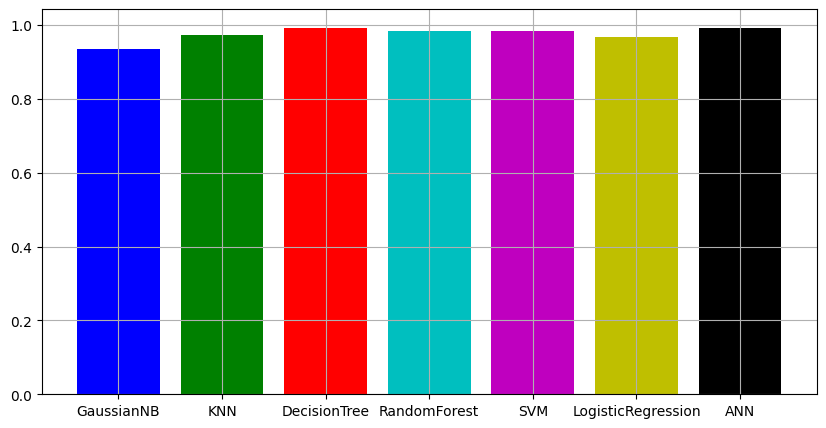

In [73]:
plt.figure(figsize=(10,5))
plt.bar(title, acc_train, color = colors)
plt.grid()
plt.show()

In [74]:
acc_test  =[gnb_acc_test, knn_acc_test, dt_acc_test, rf_acc_test, svm_acc_test, lr_acc_test, ann_acc_test]
title = ['GaussianNB', 'KNN', 'DecisionTree', 'RandomForest', 'SVM', 'LogisticRegression', 'ANN']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

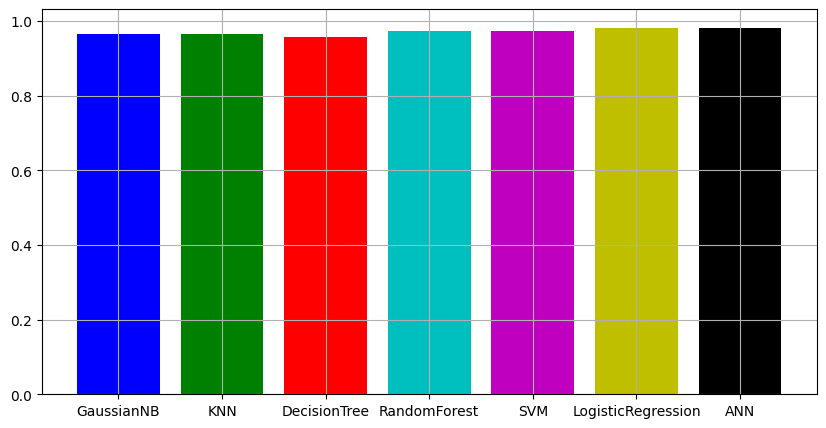

In [75]:
plt.figure(figsize=(10,5))
plt.bar(title, acc_test, color = colors)
plt.grid()
plt.show()

In [76]:
precision_test = [gnb_precision_test, knn_precision_test, dt_precision_test, rf_precision_test, svm_precision_test, lr_precision_test, ann_precision_test]
title = ['GaussianNB', 'KNN', 'DecisionTree', 'RandomForest', 'SVM', 'LogisticRegression', 'ANN']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

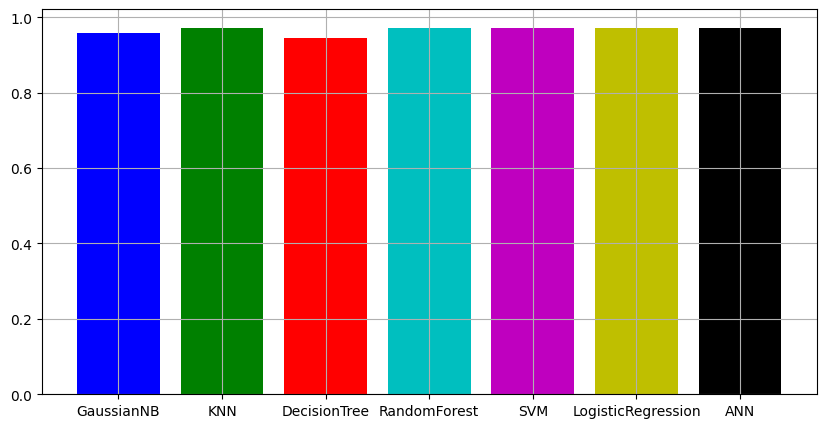

In [77]:
plt.figure(figsize=(10,5))
plt.bar(title, precision_test, color = colors)
plt.grid()
plt.show()

In [78]:
recall_test = [gnb_recall_test, knn_recall_test, dt_recall_test, rf_recall_test, svm_recall_test, lr_recall_test, ann_recall_test]  
title = ['GaussianNB', 'KNN', 'DecisionTree', 'RandomForest', 'SVM', 'LogisticRegression', 'ANN']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']


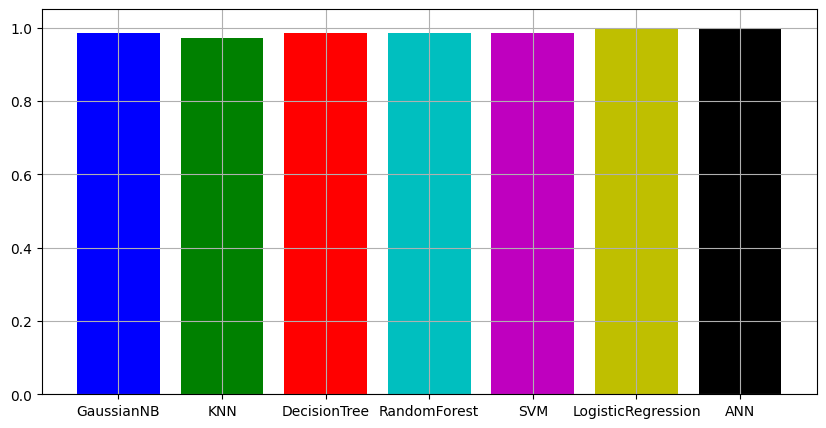

In [79]:
plt.figure(figsize=(10,5))
plt.bar(title, recall_test, color = colors)
plt.grid()
plt.show()

the end!